In [768]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [769]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="",
  database="ruet"
)

# Create a cursor object
cursor = mydb.cursor()


In [770]:
# Execute a query

s="SELECT dip.roll , (SELECT courselist.ccode FROM courselist WHERE dip.cid= courselist.cid) as Code,(SELECT courselist.cname FROM courselist WHERE dip.cid= courselist.cid) as Course_name, dip.cid ,(SELECT SUM(co.mark)   FROM co WHERE co.roll=dip.roll and co.cid=dip.cid and co.cono='CO1') /(SELECT SUM(co.fullmark)   FROM co WHERE co.roll=dip.roll and co.cid=dip.cid and co.cono='CO1')*100  as co1 ,(SELECT SUM(co.mark)   FROM co WHERE co.roll=dip.roll and co.cid=dip.cid and co.cono='CO2') /(SELECT SUM(co.fullmark)   FROM co WHERE co.roll=dip.roll and co.cid=dip.cid and co.cono='CO2')*100  as co2 ,(SELECT SUM(co.mark)   FROM co WHERE co.roll=dip.roll and co.cid=dip.cid and co.cono='CO3') /(SELECT SUM(co.fullmark)   FROM co WHERE co.roll=dip.roll and co.cid=dip.cid and co.cono='CO3')*100  as co3 ,(SELECT SUM(co.mark)   FROM co WHERE co.roll=dip.roll and co.cid=dip.cid and co.cono='CO4') /(SELECT SUM(co.fullmark)   FROM co WHERE co.roll=dip.roll and co.cid=dip.cid and co.cono='CO4')*100  as co4  , (SELECT SUM(co.mark)   FROM co WHERE co.roll=dip.roll and co.cid=dip.cid and co.cono='CO5') /(SELECT SUM(co.fullmark)   FROM co WHERE co.roll=dip.roll and co.cid=dip.cid and co.cono='CO5')*100  as co5 ,(SELECT SUM(marks.marks) FROM marks WHERE marks.ctNo='1' and  marks.roll = dip.roll and marks.cid =dip.cid) as CT1,(SELECT SUM(marks.marks) FROM marks WHERE marks.ctNo='2' and  marks.roll = dip.roll and marks.cid =dip.cid) as CT2,(SELECT SUM(marks.marks) FROM marks WHERE marks.ctNo='3' and  marks.roll = dip.roll and marks.cid =dip.cid) as CT3,(SELECT SUM(marks.marks) FROM marks WHERE marks.ctNo='4' and  marks.roll = dip.roll and marks.cid =dip.cid) as CT4,(SELECT AVG(attendance.attendance)*100 FROM attendance WHERE attendance.roll=dip.roll and attendance.cid=dip.cid) as attendance,((SELECT AVG(finalmark.partA) FROM finalmark WHERE finalmark.roll = dip.roll and finalmark.cid =dip.cid)+(SELECT AVG(finalmark.partB) FROM finalmark WHERE finalmark.roll = dip.roll and finalmark.cid =dip.cid)) as Final_mark FROM ((SELECT roll ,cid FROM co ) UNION (SELECT roll ,cid FROM marks ) UNION (SELECT roll ,cid FROM finalmark ) ) AS dip ORDER by dip.roll;"

cursor.execute(s)

# Fetch the results
results = cursor.fetchall()




In [771]:
import pandas as pd

In [772]:
data = pd.DataFrame(results)

In [773]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1803061,CSE3201,Operating Systems,9,0.000000,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,None,NaN
1,1803061,CSE3105,software engineering,5,NaN,NaN,NaN,NaN,NaN,7.0,NaN,0.0,NaN,66.6667,20.0
2,1803061,CSE3207,Peripherals and Interfacings,12,33.333333,16.666667,25.0,40.625,25.925926,NaN,NaN,NaN,NaN,None,0.0
3,1803061,CSE3203,Computer Architecture and Design,10,0.000000,NaN,NaN,0.000,NaN,NaN,3.0,0.0,NaN,None,NaN
4,1803061,CSE3107,applied statistics,6,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,5.0,33.3333,14.0


In [774]:
data.columns=[ 'roll' , 'Code' ,'Course' , 'cid' , 'CO1' , 'CO2'  , 'CO3'  , 'CO4' , 'CO5' , 'CT1' ,'CT2' ,'CT3' ,'CT4' ,'attendance' , 'final']

In [775]:
data['final']

0       NaN
1      20.0
2       0.0
3       NaN
4      14.0
       ... 
595    32.0
596    46.0
597    22.0
598    28.0
599    40.0
Name: final, Length: 600, dtype: float64

In [776]:
data.head()

,roll,Code,Course,cid,CO1,CO2,CO3,CO4,CO5,CT1,CT2,CT3,CT4,attendance,final
0,1803061,CSE3201,Operating Systems,9,0.000000,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,None,NaN
1,1803061,CSE3105,software engineering,5,NaN,NaN,NaN,NaN,NaN,7.0,NaN,0.0,NaN,66.6667,20.0
2,1803061,CSE3207,Peripherals and Interfacings,12,33.333333,16.666667,25.0,40.625,25.925926,NaN,NaN,NaN,NaN,None,0.0
3,1803061,CSE3203,Computer Architecture and Design,10,0.000000,NaN,NaN,0.000,NaN,NaN,3.0,0.0,NaN,None,NaN
4,1803061,CSE3107,applied statistics,6,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,5.0,33.3333,14.0


In [777]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   roll        600 non-null    object 
 1   Code        540 non-null    object 
 2   Course      540 non-null    object 
 3   cid         600 non-null    object 
 4   CO1         420 non-null    float64
 5   CO2         240 non-null    float64
 6   CO3         300 non-null    float64
 7   CO4         300 non-null    float64
 8   CO5         300 non-null    float64
 9   CT1         300 non-null    float64
 10  CT2         181 non-null    float64
 11  CT3         420 non-null    float64
 12  CT4         180 non-null    float64
 13  attendance  420 non-null    object 
 14  final       420 non-null    float64
dtypes: float64(10), object(5)
memory usage: 70.4+ KB


In [778]:
print(len(data))

600


In [779]:
data.head()

,roll,Code,Course,cid,CO1,CO2,CO3,CO4,CO5,CT1,CT2,CT3,CT4,attendance,final
0,1803061,CSE3201,Operating Systems,9,0.000000,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,None,NaN
1,1803061,CSE3105,software engineering,5,NaN,NaN,NaN,NaN,NaN,7.0,NaN,0.0,NaN,66.6667,20.0
2,1803061,CSE3207,Peripherals and Interfacings,12,33.333333,16.666667,25.0,40.625,25.925926,NaN,NaN,NaN,NaN,None,0.0
3,1803061,CSE3203,Computer Architecture and Design,10,0.000000,NaN,NaN,0.000,NaN,NaN,3.0,0.0,NaN,None,NaN
4,1803061,CSE3107,applied statistics,6,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,5.0,33.3333,14.0


In [780]:
data.isnull().sum()

roll            0
Code           60
Course         60
cid             0
CO1           180
CO2           360
CO3           300
CO4           300
CO5           300
CT1           300
CT2           419
CT3           180
CT4           420
attendance    180
final         180
dtype: int64

<Axes: >

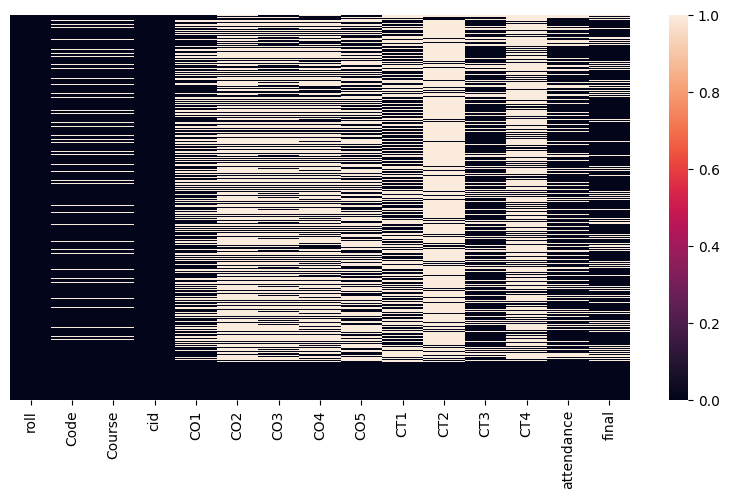

In [781]:
sns.heatmap(data.isnull(), yticklabels=False)

In [782]:
print(set(data['Code'].unique()))
print(set(data['cid'].unique()))

{'CSE3207', 'CSE3107', None, 'CSE3205', 'CSE3105', 'CSE 2203', 'CSE 1101', 'CSE3109', 'CSE3203', 'CSE3201'}
{'10', '30', '28', '4', '1', '6', '11', '12', '9', '5'}


In [783]:
data.dropna(inplace=True)

<Axes: >

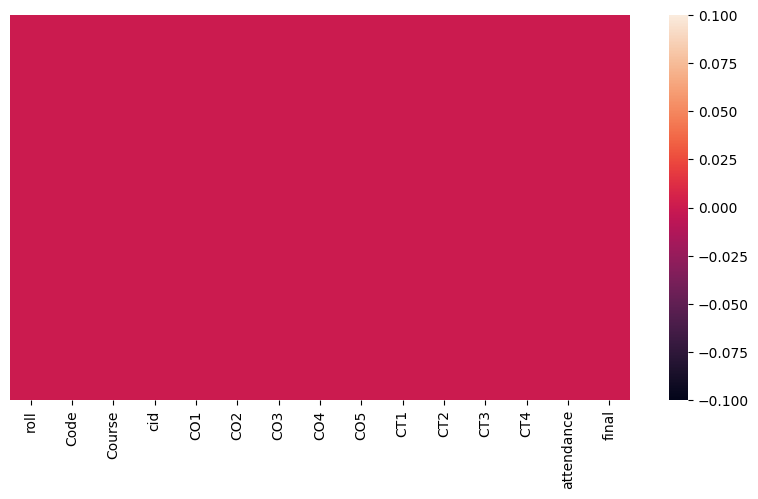

In [784]:
sns.heatmap(data.isnull(), yticklabels=False)

In [785]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 540 to 599
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   roll        60 non-null     object 
 1   Code        60 non-null     object 
 2   Course      60 non-null     object 
 3   cid         60 non-null     object 
 4   CO1         60 non-null     float64
 5   CO2         60 non-null     float64
 6   CO3         60 non-null     float64
 7   CO4         60 non-null     float64
 8   CO5         60 non-null     float64
 9   CT1         60 non-null     float64
 10  CT2         60 non-null     float64
 11  CT3         60 non-null     float64
 12  CT4         60 non-null     float64
 13  attendance  60 non-null     object 
 14  final       60 non-null     float64
dtypes: float64(10), object(5)
memory usage: 7.5+ KB


In [786]:
df = pd.DataFrame(data)
df.loc[df['attendance'] < 60, 'attendance'] = 0
df.loc[(df['attendance'] >= 60) & (df['attendance'] < 70), 'attendance'] = 4
df.loc[(df['attendance'] >= 70) & (df['attendance'] < 80), 'attendance'] = 5
df.loc[(df['attendance'] >= 80) & (df['attendance'] < 85), 'attendance'] = 6
df.loc[(df['attendance'] >= 85) & (df['attendance'] < 90), 'attendance'] = 7
df.loc[df['attendance'] >= 90, 'attendance']=8
data=df

In [787]:
data.head()

,roll,Code,Course,cid,CO1,CO2,CO3,CO4,CO5,CT1,CT2,CT3,CT4,attendance,final
540,2003001,CSE 1101,Computer Programming,28,72.727273,69.444444,76.666667,59.090909,36.363636,19.0,17.0,18.0,20.0,4,38.0
541,2003002,CSE 1101,Computer Programming,28,84.090909,77.777778,63.333333,81.818182,38.636364,17.0,18.0,15.0,16.0,0,50.0
542,2003003,CSE 1101,Computer Programming,28,52.272727,69.444444,70.000000,40.909091,45.454545,18.0,17.0,18.0,17.0,8,26.0
543,2003004,CSE 1101,Computer Programming,28,59.090909,63.888889,46.666667,59.090909,20.454545,18.0,19.0,17.0,20.0,4,22.0
544,2003005,CSE 1101,Computer Programming,28,72.727273,69.444444,60.000000,72.727273,0.000000,19.0,15.0,20.0,9.0,8,38.0


In [788]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 540 to 599
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   roll        60 non-null     object 
 1   Code        60 non-null     object 
 2   Course      60 non-null     object 
 3   cid         60 non-null     object 
 4   CO1         60 non-null     float64
 5   CO2         60 non-null     float64
 6   CO3         60 non-null     float64
 7   CO4         60 non-null     float64
 8   CO5         60 non-null     float64
 9   CT1         60 non-null     float64
 10  CT2         60 non-null     float64
 11  CT3         60 non-null     float64
 12  CT4         60 non-null     float64
 13  attendance  60 non-null     object 
 14  final       60 non-null     float64
dtypes: float64(10), object(5)
memory usage: 7.5+ KB


In [789]:
data['ctavg']=0.0

In [790]:
data.head()

,roll,Code,Course,cid,CO1,CO2,CO3,CO4,CO5,CT1,CT2,CT3,CT4,attendance,final,ctavg
540,2003001,CSE 1101,Computer Programming,28,72.727273,69.444444,76.666667,59.090909,36.363636,19.0,17.0,18.0,20.0,4,38.0,0.0
541,2003002,CSE 1101,Computer Programming,28,84.090909,77.777778,63.333333,81.818182,38.636364,17.0,18.0,15.0,16.0,0,50.0,0.0
542,2003003,CSE 1101,Computer Programming,28,52.272727,69.444444,70.000000,40.909091,45.454545,18.0,17.0,18.0,17.0,8,26.0,0.0
543,2003004,CSE 1101,Computer Programming,28,59.090909,63.888889,46.666667,59.090909,20.454545,18.0,19.0,17.0,20.0,4,22.0,0.0
544,2003005,CSE 1101,Computer Programming,28,72.727273,69.444444,60.000000,72.727273,0.000000,19.0,15.0,20.0,9.0,8,38.0,0.0


In [791]:
data['ctavg'] += (data['CT1']+data['CT2']+data['CT3']+data['CT4'])/3.0


In [792]:
data['ctavg'] -= (data[['CT1', 'CT2', 'CT3', 'CT4']].min(axis=1)).div(3).values


In [793]:
data.head()

,roll,Code,Course,cid,CO1,CO2,CO3,CO4,CO5,CT1,CT2,CT3,CT4,attendance,final,ctavg
540,2003001,CSE 1101,Computer Programming,28,72.727273,69.444444,76.666667,59.090909,36.363636,19.0,17.0,18.0,20.0,4,38.0,19.000000
541,2003002,CSE 1101,Computer Programming,28,84.090909,77.777778,63.333333,81.818182,38.636364,17.0,18.0,15.0,16.0,0,50.0,17.000000
542,2003003,CSE 1101,Computer Programming,28,52.272727,69.444444,70.000000,40.909091,45.454545,18.0,17.0,18.0,17.0,8,26.0,17.666667
543,2003004,CSE 1101,Computer Programming,28,59.090909,63.888889,46.666667,59.090909,20.454545,18.0,19.0,17.0,20.0,4,22.0,19.000000
544,2003005,CSE 1101,Computer Programming,28,72.727273,69.444444,60.000000,72.727273,0.000000,19.0,15.0,20.0,9.0,8,38.0,18.000000


In [794]:
data['total']=0.0

In [795]:
data['total']=data['final']+data['ctavg']+data['attendance']

In [796]:
data.head()

,roll,Code,Course,cid,CO1,CO2,CO3,CO4,CO5,CT1,CT2,CT3,CT4,attendance,final,ctavg,total
540,2003001,CSE 1101,Computer Programming,28,72.727273,69.444444,76.666667,59.090909,36.363636,19.0,17.0,18.0,20.0,4,38.0,19.000000,61.0
541,2003002,CSE 1101,Computer Programming,28,84.090909,77.777778,63.333333,81.818182,38.636364,17.0,18.0,15.0,16.0,0,50.0,17.000000,67.0
542,2003003,CSE 1101,Computer Programming,28,52.272727,69.444444,70.000000,40.909091,45.454545,18.0,17.0,18.0,17.0,8,26.0,17.666667,51.666667
543,2003004,CSE 1101,Computer Programming,28,59.090909,63.888889,46.666667,59.090909,20.454545,18.0,19.0,17.0,20.0,4,22.0,19.000000,45.0
544,2003005,CSE 1101,Computer Programming,28,72.727273,69.444444,60.000000,72.727273,0.000000,19.0,15.0,20.0,9.0,8,38.0,18.000000,64.0


In [797]:
df = pd.DataFrame(data)
df.loc[df['total'] < 40, 'total'] = 0
df.loc[(df['total'] >= 40) & (df['total'] < 45), 'total'] = 1
df.loc[(df['total'] >= 45) & (df['total'] < 50), 'total'] = 2
df.loc[(df['total'] >= 50) & (df['total'] < 55), 'total'] = 3
df.loc[(df['total'] >= 55) & (df['total'] < 60), 'total'] = 4
df.loc[(df['total'] >= 60) & (df['total'] < 65), 'total'] = 5
df.loc[(df['total'] >= 65) & (df['total'] < 70), 'total'] = 6
df.loc[(df['total'] >= 70) & (df['total'] < 75), 'total'] = 7
df.loc[(df['total'] >= 75) & (df['total'] < 80), 'total'] = 8
df.loc[df['total'] >= 80, 'total']=9
data=df

In [798]:
data['total'] = data['total'].astype(str)
data = data.replace({'total': {'0': 'F',
                                '1': 'D',
                                '2': 'C' ,
                                '3': 'C+',
                                '4': 'B-',
                                '5': 'B',
                                '6': 'B+',
                                '7': 'A-',
                                '8': 'A',
                                '9': 'A+'
                                }})

In [799]:
len(data)

60

In [800]:
data.head()

,roll,Code,Course,cid,CO1,CO2,CO3,CO4,CO5,CT1,CT2,CT3,CT4,attendance,final,ctavg,total
540,2003001,CSE 1101,Computer Programming,28,72.727273,69.444444,76.666667,59.090909,36.363636,19.0,17.0,18.0,20.0,4,38.0,19.000000,B
541,2003002,CSE 1101,Computer Programming,28,84.090909,77.777778,63.333333,81.818182,38.636364,17.0,18.0,15.0,16.0,0,50.0,17.000000,B+
542,2003003,CSE 1101,Computer Programming,28,52.272727,69.444444,70.000000,40.909091,45.454545,18.0,17.0,18.0,17.0,8,26.0,17.666667,C+
543,2003004,CSE 1101,Computer Programming,28,59.090909,63.888889,46.666667,59.090909,20.454545,18.0,19.0,17.0,20.0,4,22.0,19.000000,C
544,2003005,CSE 1101,Computer Programming,28,72.727273,69.444444,60.000000,72.727273,0.000000,19.0,15.0,20.0,9.0,8,38.0,18.000000,B


In [801]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (10.0, 5.0)
# Mean X and Y
def regression_line(X,Y,name1,name2):
    mean_x = np.mean(X)

    mean_y = np.mean(Y)

    # Total number of values

    n = len(X)

    # Using the formula to calculate b1 and b2

    numer = 0

    denom = 0

    for i in range(n):

        numer += (X[i] - mean_x)*(Y[i] -mean_y)

        denom += (X[i] - mean_x) ** 2

    b1 = numer / denom

    b0 = mean_y - (b1 * mean_x)

    # Print coefficients

    print('Slope = ',b1)
    print('C = ',b0)

    # Plotting Values and Regression Line

    max_x = np.max(X) + 10
    min_x = np.min(X) - 10

    # Calculating Line values x and y 


    x = np.linspace (min_x, max_x, 100 ) 
    y = b0 + b1*x

    # Ploting Line

    # Ploting Scatter Points

    plt.plot(x, y, color='blue', label='Regression Line') 
    plt.scatter (X, Y, c='#ef5423', label='Scatter Plot')

    plt.xlabel(name1) 
    plt.ylabel(name2) 
    plt.legend()
    plt.show()

Slope =  0.032876625636806704
C =  56.62401951994711


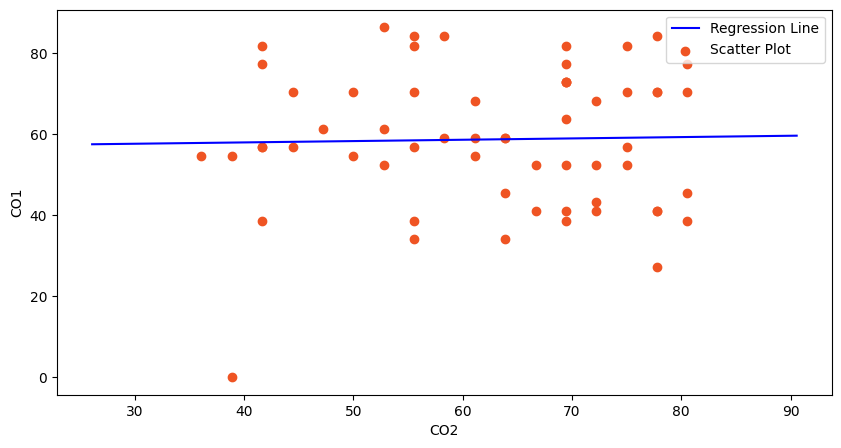

Slope =  -0.054730915654143945
C =  61.55369670893544


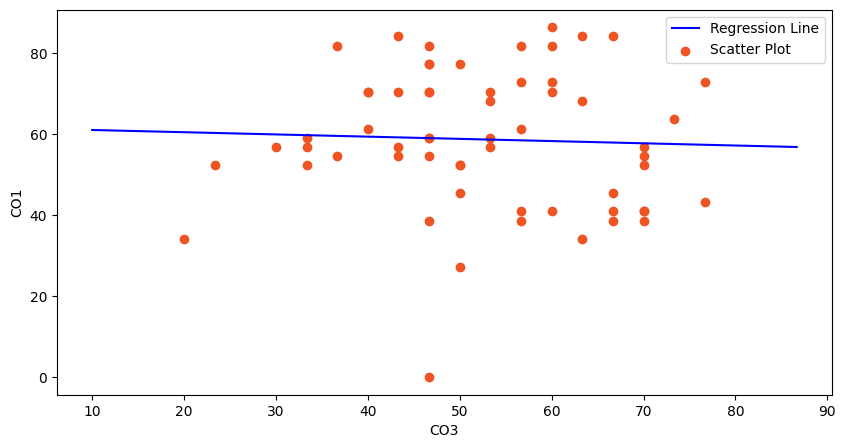

Slope =  0.16233912212667892
C =  49.56111443213113


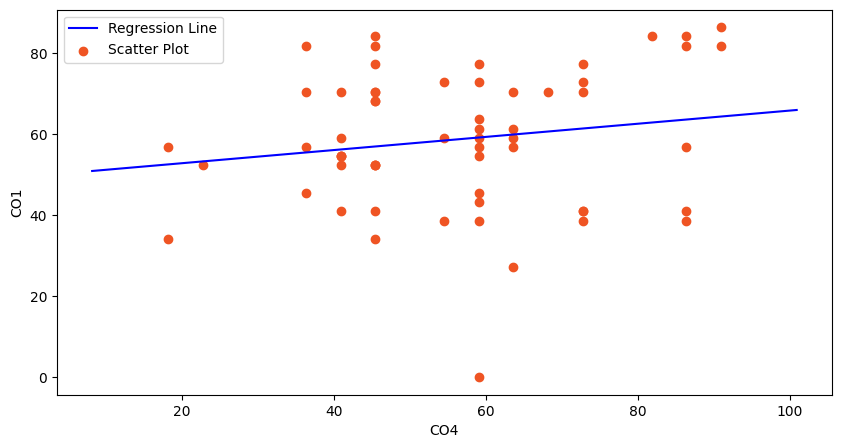

Slope =  0.024203069657615078
C =  57.56860219670137


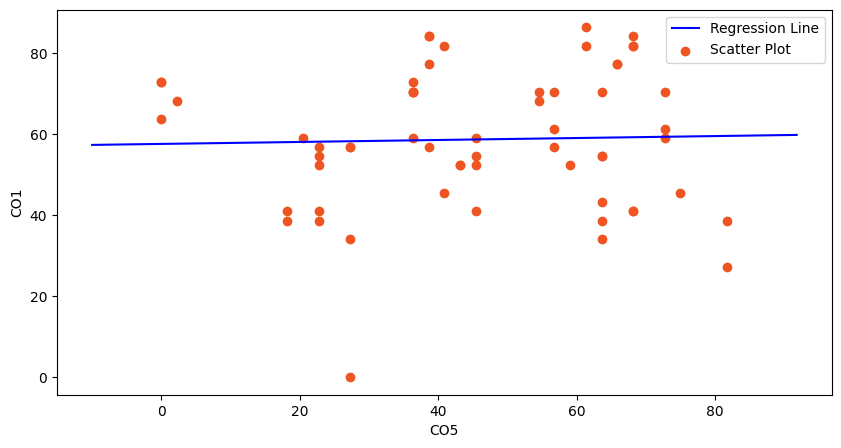

Slope =  0.01888039224432015
C =  61.25331839950308


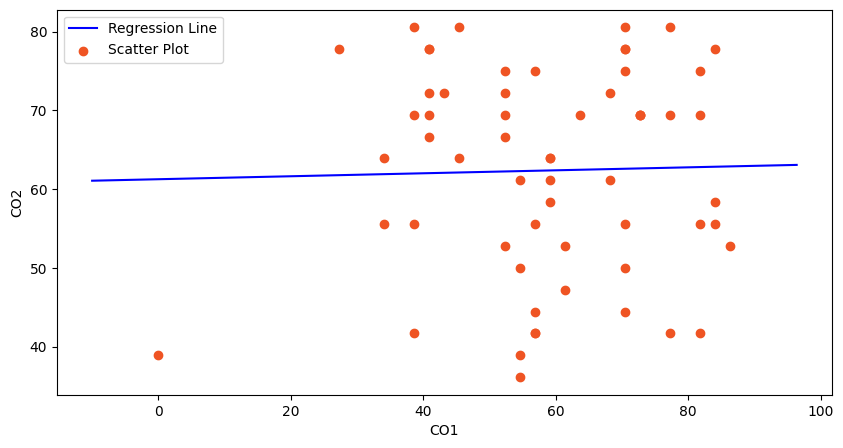

Slope =  0.23048804944303655
C =  50.23487873208024


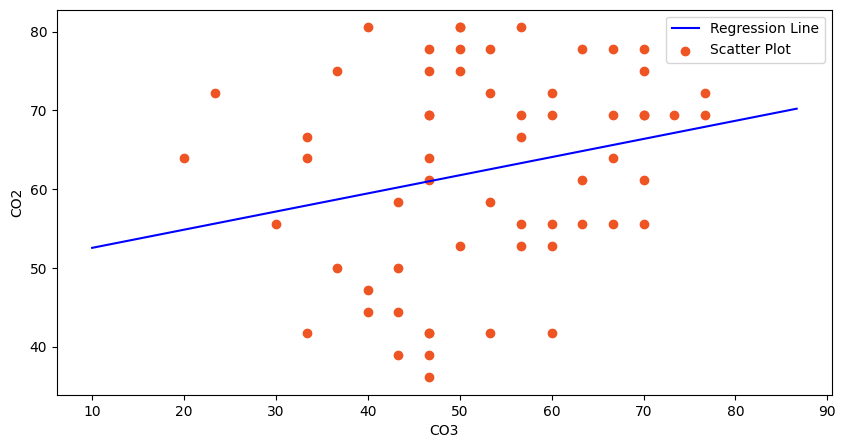

Slope =  -0.05182749770508993
C =  65.27051836864683


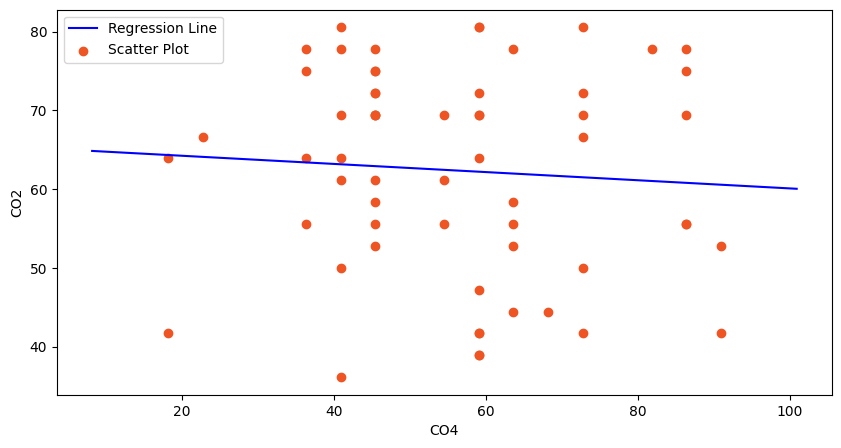

Slope =  -0.0015593725271144604
C =  62.43234608337247


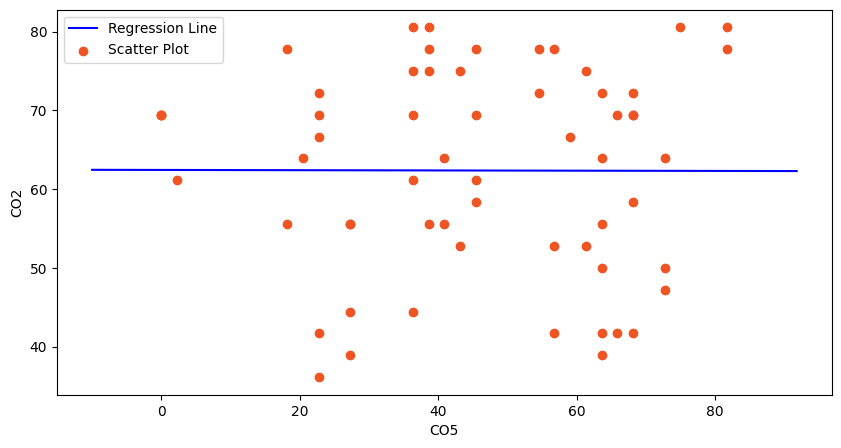

Slope =  -0.03200399116525172
C =  54.4889210472844


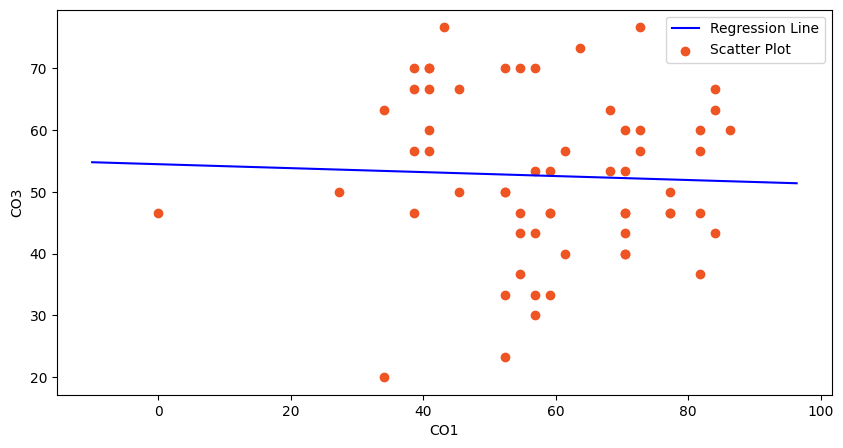

Slope =  0.23469079939668183
C =  37.97553209317914


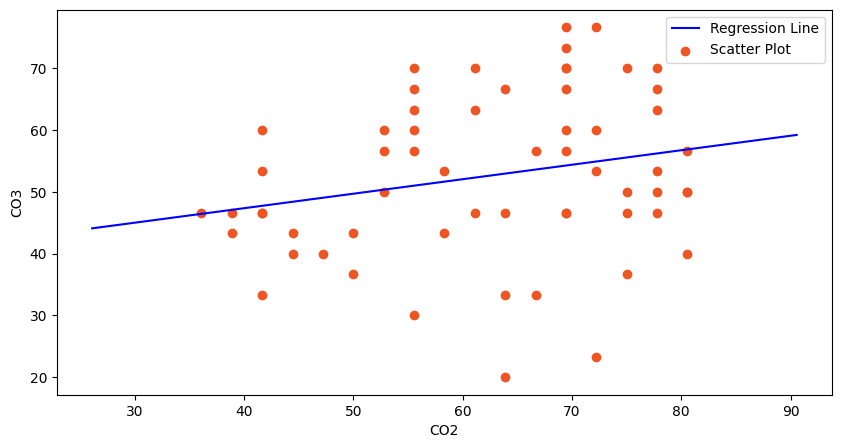

Slope =  0.3375896888289401
C =  33.66005357912288


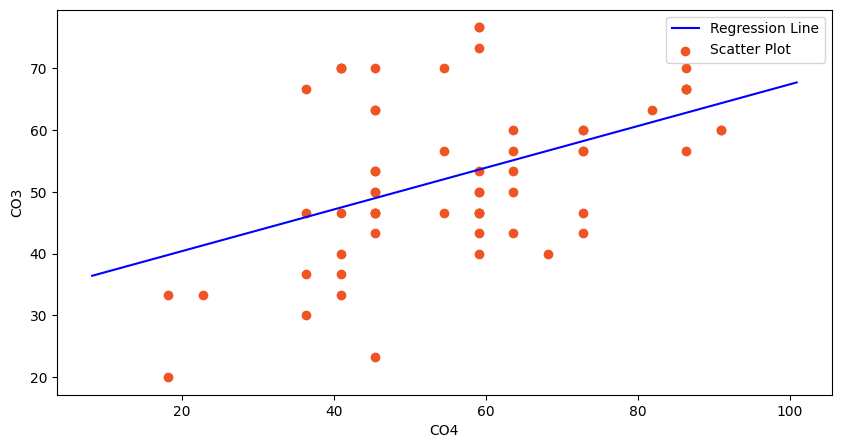

Slope =  -0.1334171205138947
C =  58.70584775276857


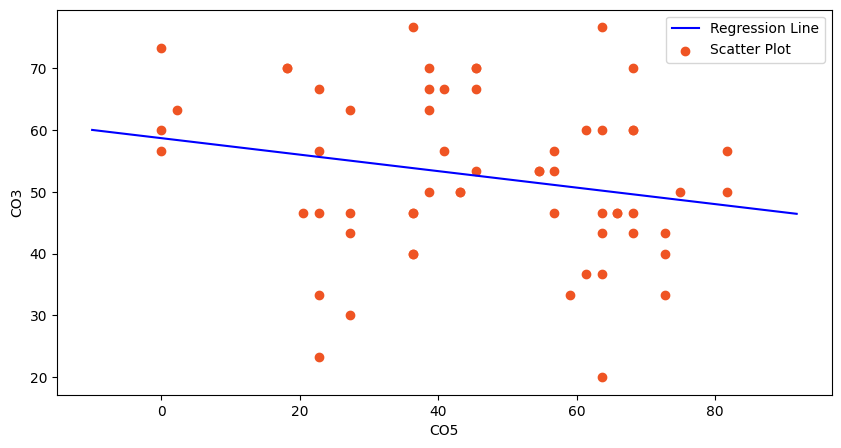

Slope =  0.17178199911784675
C =  46.05718497600209


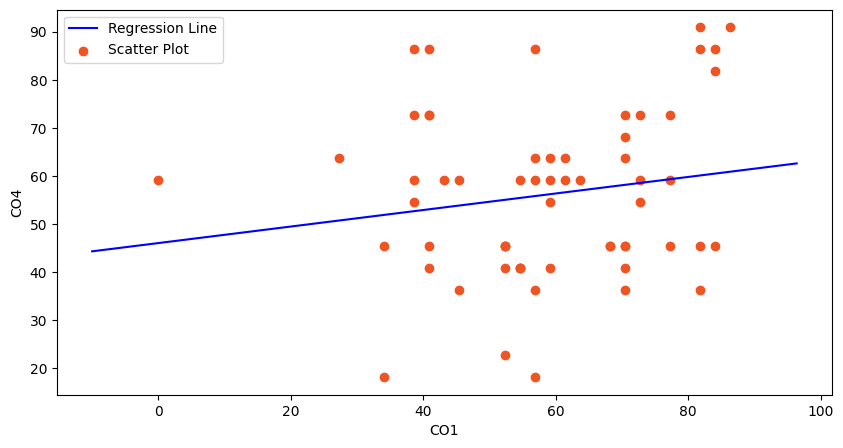

Slope =  -0.0954972629180773
C =  62.09167906000484


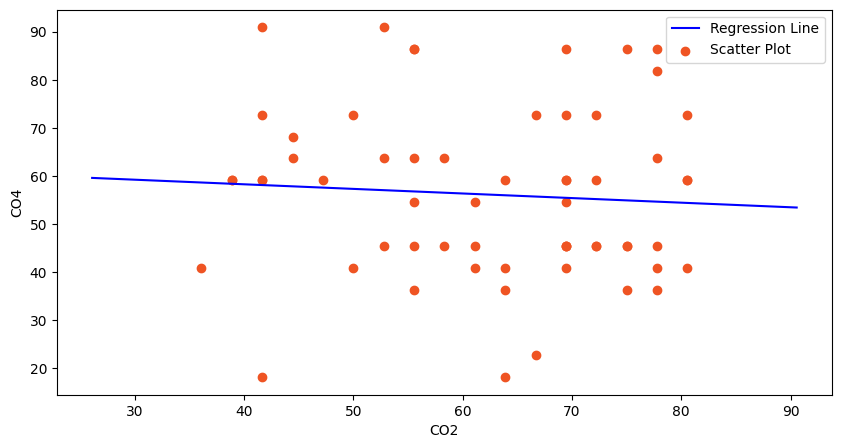

Slope =  0.6109029254459599
C =  23.99608194762341


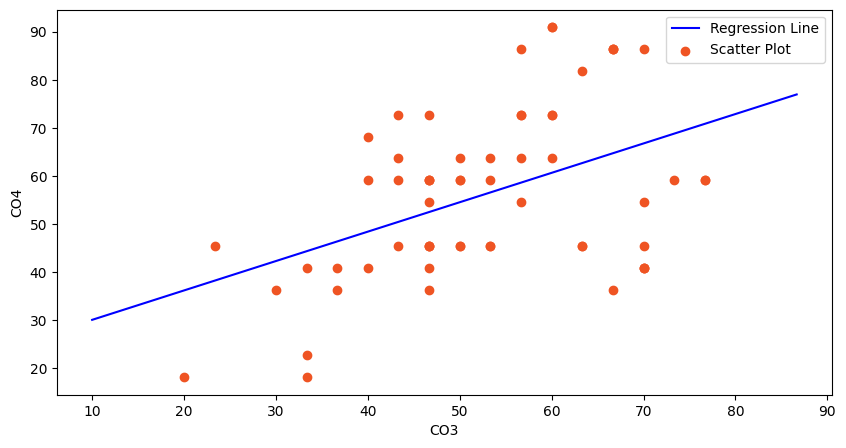

Slope =  0.027383174010740034
C =  54.88545045996392


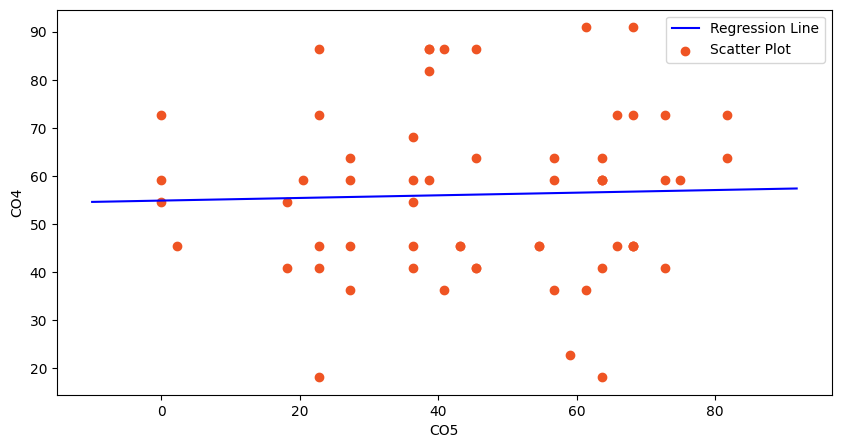

Slope =  0.03779382393608845
C =  43.46429419405298


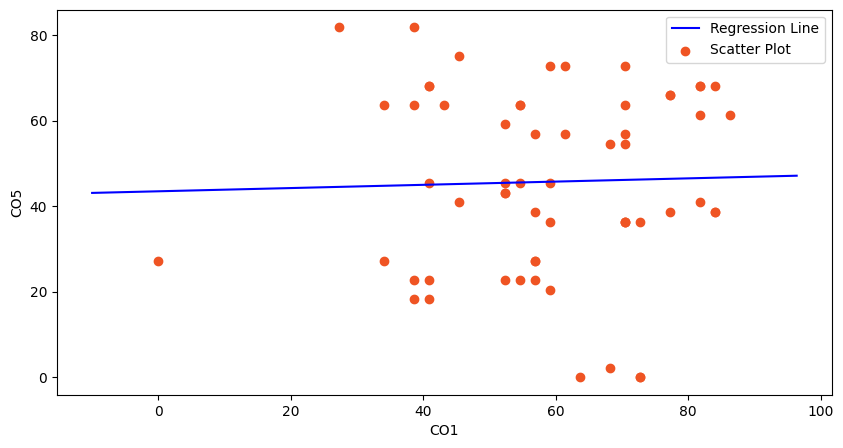

Slope =  -0.004240103787615094
C =  45.94623576524028


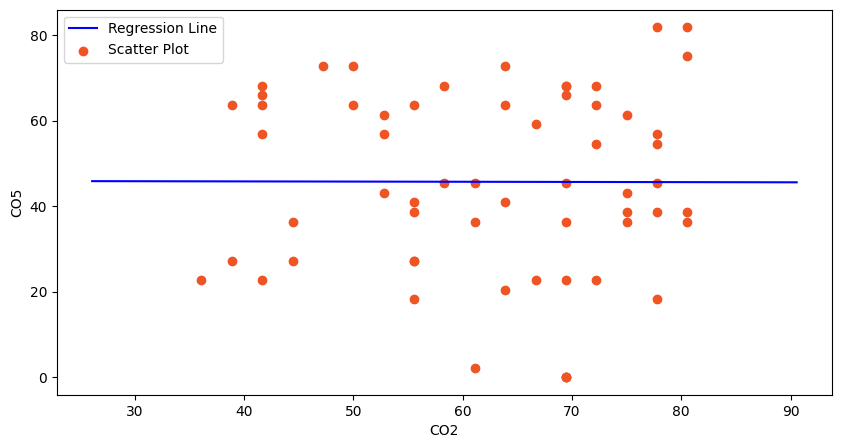

Slope =  -0.3562792424435784
C =  64.42606499259976


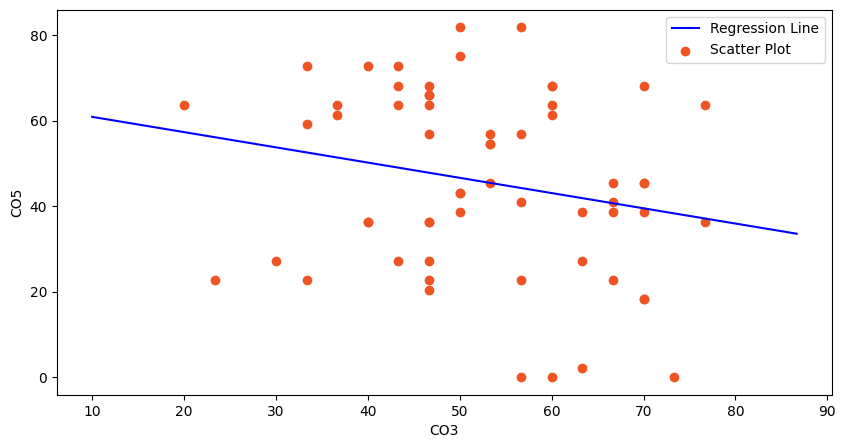

Slope =  0.04040914966559887
C =  43.413395461953876


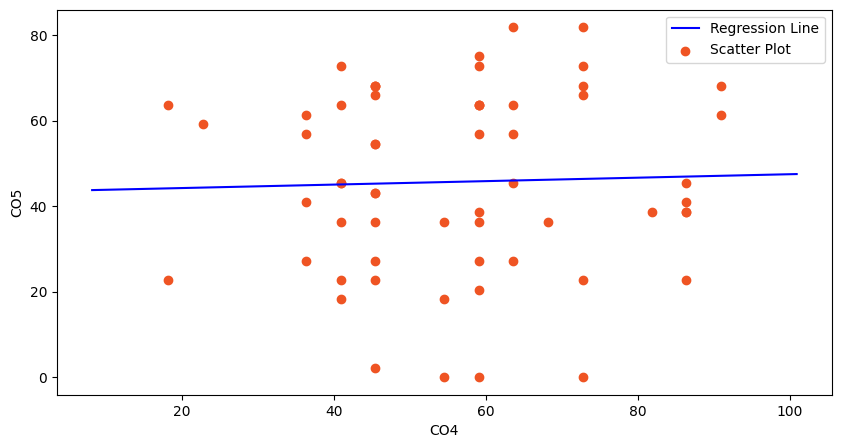

In [828]:
for i in range(1,6):
    for j in range(1,6):
        if(i!=j):
            regression_line(data['CO'+str(j)].values,data['CO'+str(i)].values,'CO'+str(j),'CO'+str(i))

Slope =  0.8777789946336653
C =  28.31771885982816


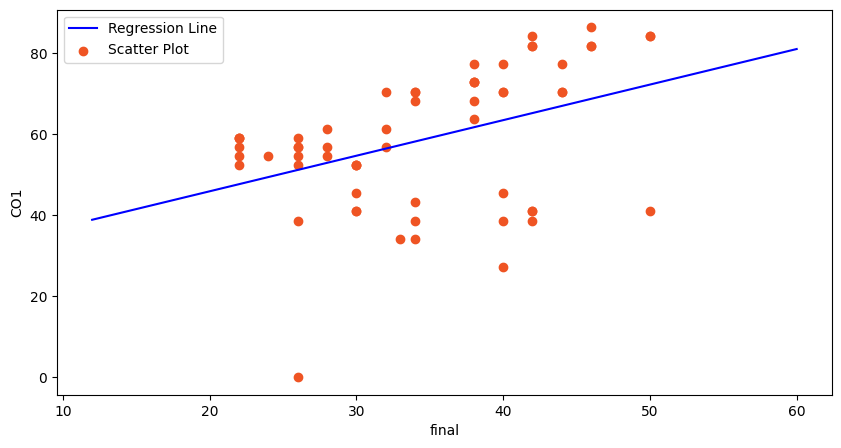

Slope =  0.5470375643412551
C =  43.442728677642705


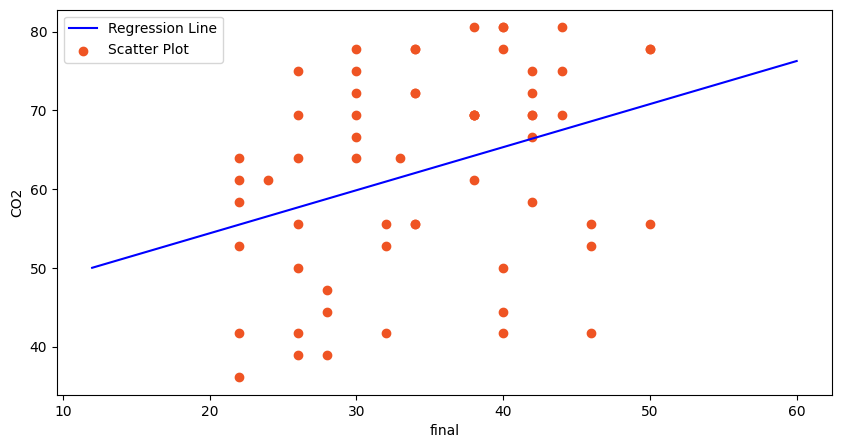

Slope =  0.37286898112656497
C =  39.716058847150734


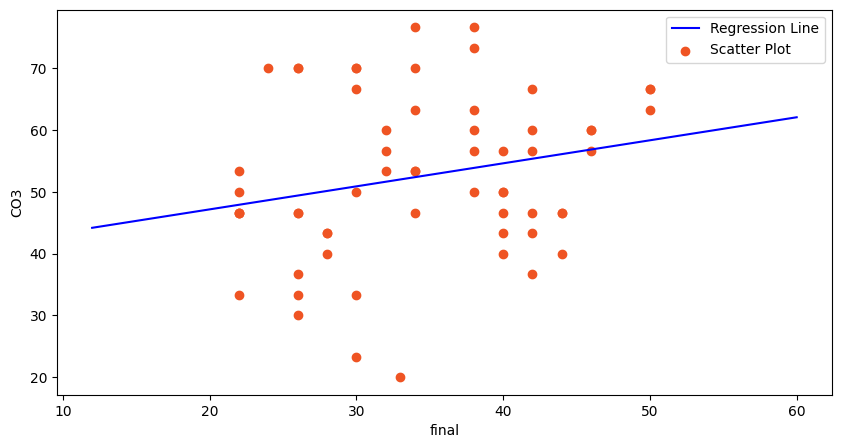

Slope =  1.1155802909170556
C =  17.555878575482126


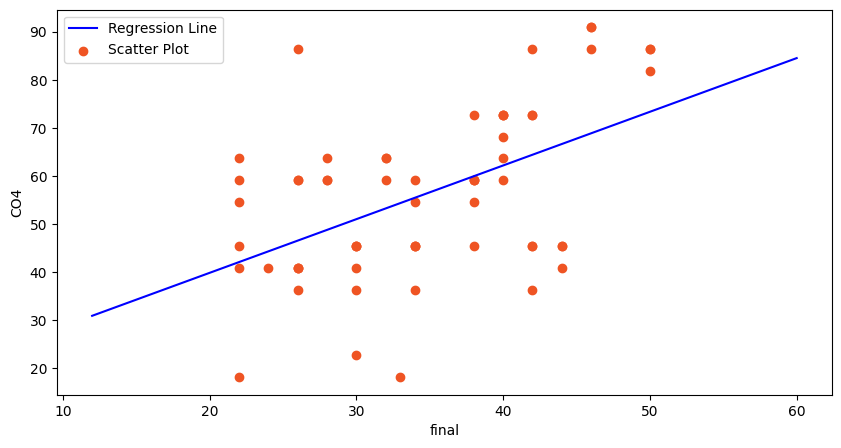

Slope =  0.31929192262124023
C =  34.63963919116695


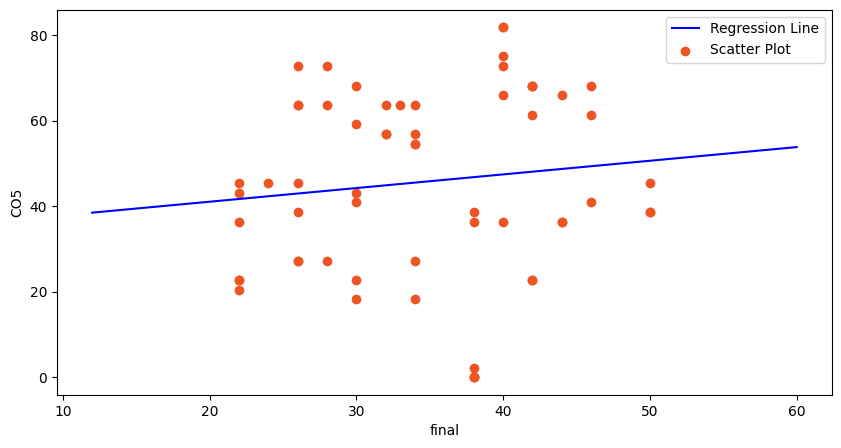

In [825]:
for i in range(1,6):
    regression_line(data['final'].values,data['CO'+str(i)].values,'final','CO'+str(i))

<Axes: xlabel='total', ylabel='ctavg'>

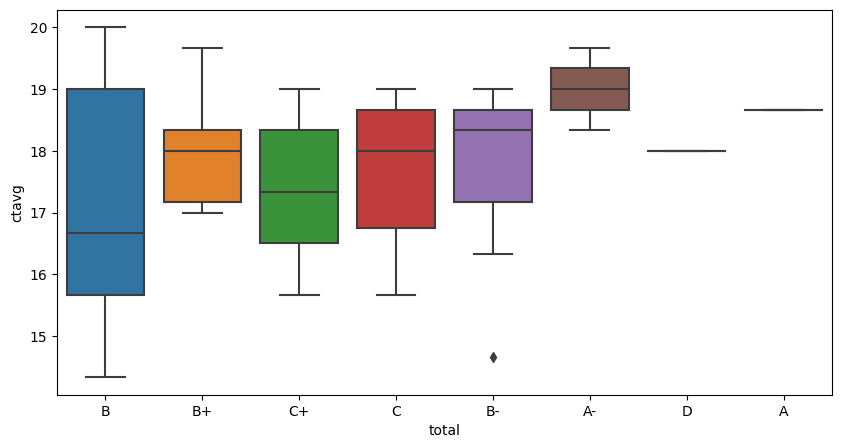

In [804]:
sns.boxplot(x="total" , y= "ctavg" , data=data)

Slope =  -0.06518453619537833
C =  8.6542985434235


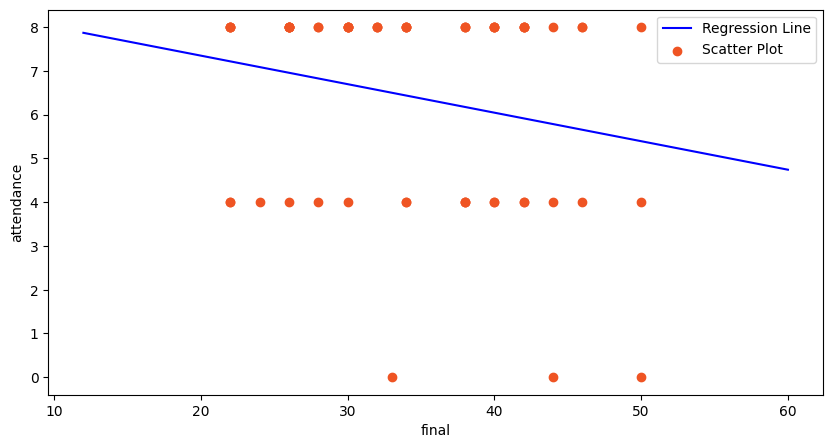

In [829]:
regression_line(data['final'].values,data['attendance'].values,'final','attendance')

Slope =  -0.0006863067206950413
C =  17.679290329646257


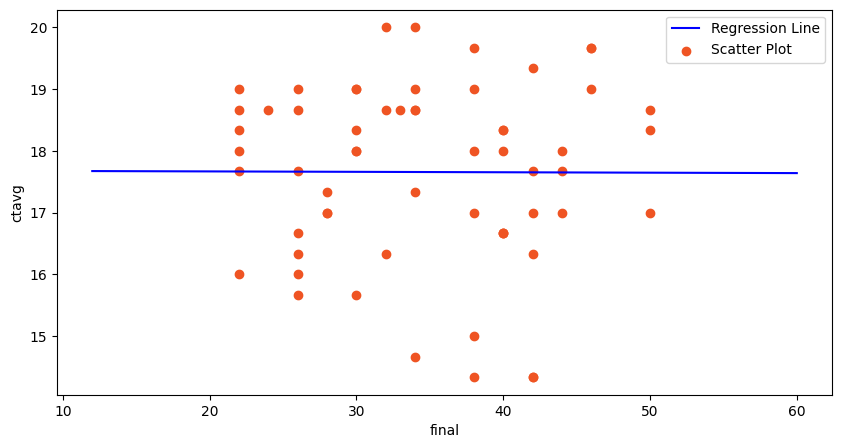

In [830]:
regression_line(data['final'].values,data['ctavg'].values,'final','ctavg')

<Axes: xlabel='total', ylabel='CO1'>

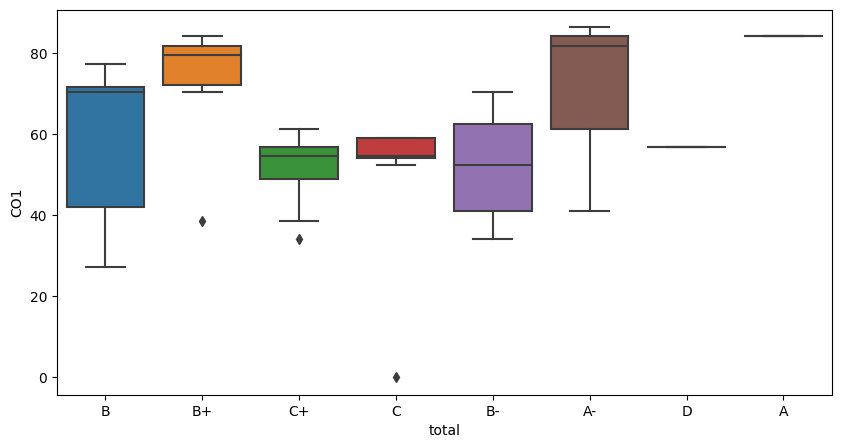

In [805]:
sns.boxplot(x="total" , y= "CO1" , data=data)

<Axes: xlabel='total', ylabel='CO2'>

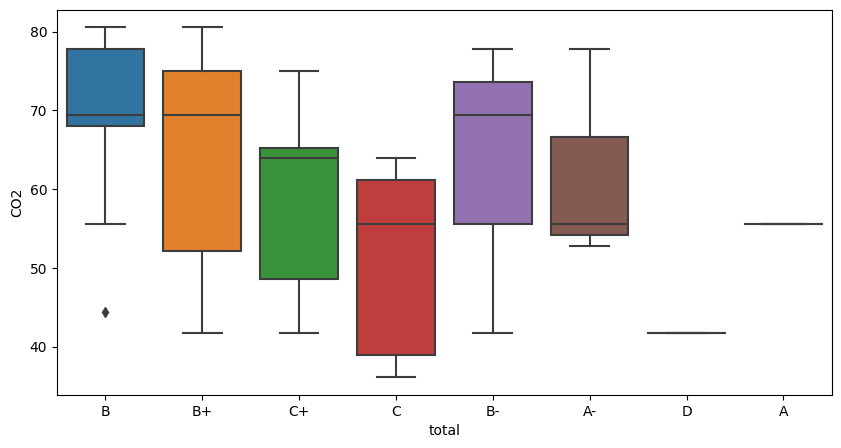

In [806]:
sns.boxplot(x="total" , y= "CO2" , data=data)

<Axes: xlabel='total', ylabel='CO3'>

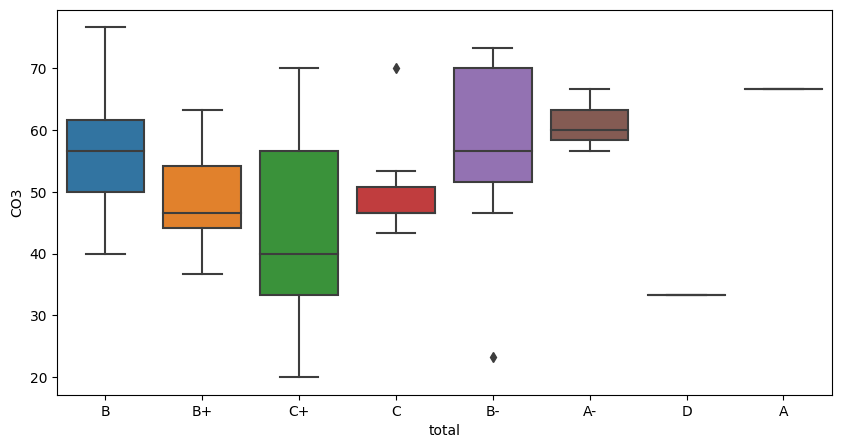

In [807]:
sns.boxplot(x="total" , y= "CO3" , data=data)

<Axes: xlabel='total', ylabel='CO4'>

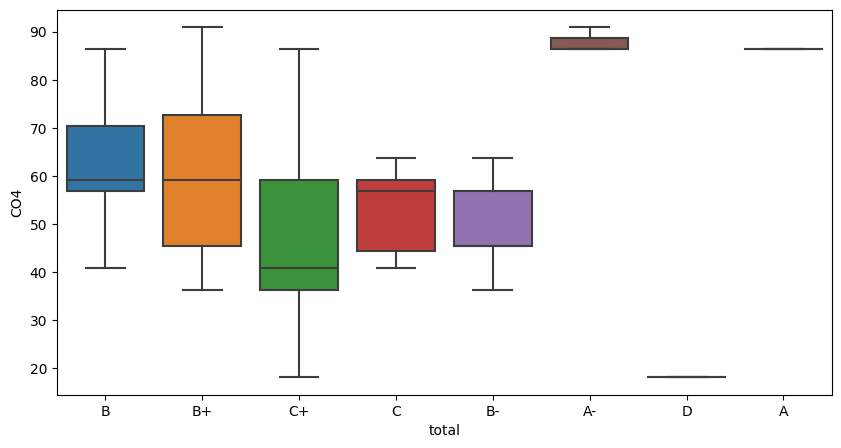

In [808]:
sns.boxplot(x="total" , y= "CO4" , data=data)

<Axes: xlabel='total', ylabel='CO5'>

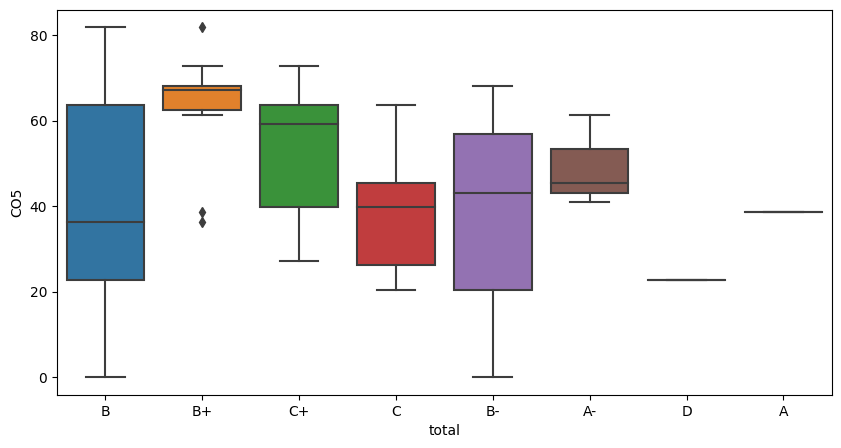

In [809]:
sns.boxplot(x="total" , y= "CO5" , data=data)

<Axes: xlabel='total', ylabel='attendance'>

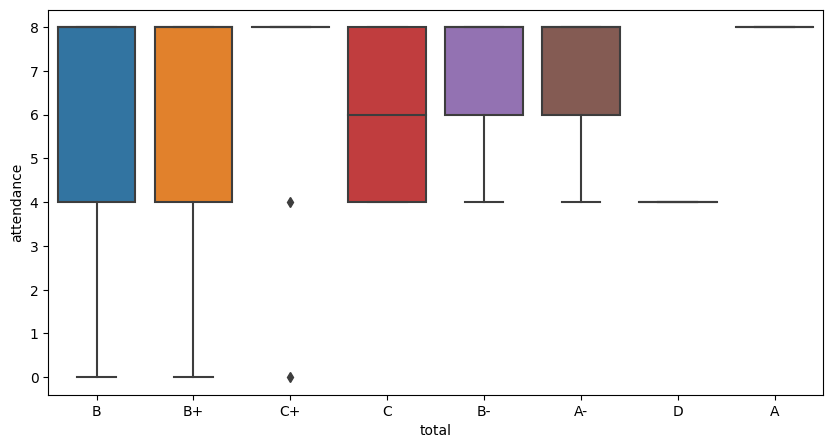

In [810]:
sns.boxplot(x="total" , y= "attendance" , data=data)

In [811]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 540 to 599
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   roll        60 non-null     object 
 1   Code        60 non-null     object 
 2   Course      60 non-null     object 
 3   cid         60 non-null     object 
 4   CO1         60 non-null     float64
 5   CO2         60 non-null     float64
 6   CO3         60 non-null     float64
 7   CO4         60 non-null     float64
 8   CO5         60 non-null     float64
 9   CT1         60 non-null     float64
 10  CT2         60 non-null     float64
 11  CT3         60 non-null     float64
 12  CT4         60 non-null     float64
 13  attendance  60 non-null     object 
 14  final       60 non-null     float64
 15  ctavg       60 non-null     float64
 16  total       60 non-null     object 
dtypes: float64(11), object(6)
memory usage: 8.4+ KB


In [812]:
dataset=data

In [813]:
dataset.head()

,roll,Code,Course,cid,CO1,CO2,CO3,CO4,CO5,CT1,CT2,CT3,CT4,attendance,final,ctavg,total
540,2003001,CSE 1101,Computer Programming,28,72.727273,69.444444,76.666667,59.090909,36.363636,19.0,17.0,18.0,20.0,4,38.0,19.000000,B
541,2003002,CSE 1101,Computer Programming,28,84.090909,77.777778,63.333333,81.818182,38.636364,17.0,18.0,15.0,16.0,0,50.0,17.000000,B+
542,2003003,CSE 1101,Computer Programming,28,52.272727,69.444444,70.000000,40.909091,45.454545,18.0,17.0,18.0,17.0,8,26.0,17.666667,C+
543,2003004,CSE 1101,Computer Programming,28,59.090909,63.888889,46.666667,59.090909,20.454545,18.0,19.0,17.0,20.0,4,22.0,19.000000,C
544,2003005,CSE 1101,Computer Programming,28,72.727273,69.444444,60.000000,72.727273,0.000000,19.0,15.0,20.0,9.0,8,38.0,18.000000,B


In [814]:
dataset=dataset.drop(['roll' , 'Code' , 'Course' ,'final', 'cid'] , axis=1)

In [815]:
dataset.head()

,CO1,CO2,CO3,CO4,CO5,CT1,CT2,CT3,CT4,attendance,ctavg,total
540,72.727273,69.444444,76.666667,59.090909,36.363636,19.0,17.0,18.0,20.0,4,19.000000,B
541,84.090909,77.777778,63.333333,81.818182,38.636364,17.0,18.0,15.0,16.0,0,17.000000,B+
542,52.272727,69.444444,70.000000,40.909091,45.454545,18.0,17.0,18.0,17.0,8,17.666667,C+
543,59.090909,63.888889,46.666667,59.090909,20.454545,18.0,19.0,17.0,20.0,4,19.000000,C
544,72.727273,69.444444,60.000000,72.727273,0.000000,19.0,15.0,20.0,9.0,8,18.000000,B


In [816]:
X = dataset.drop(['total'], axis=1)
y = dataset['total']

In [817]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

# knn algorithm

In [818]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100 , '%')

Accuracy: 44.44444444444444 %


# decission tree

In [819]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier()

# Train the classifier on the training data
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100 , '%')


Accuracy: 22.22222222222222 %


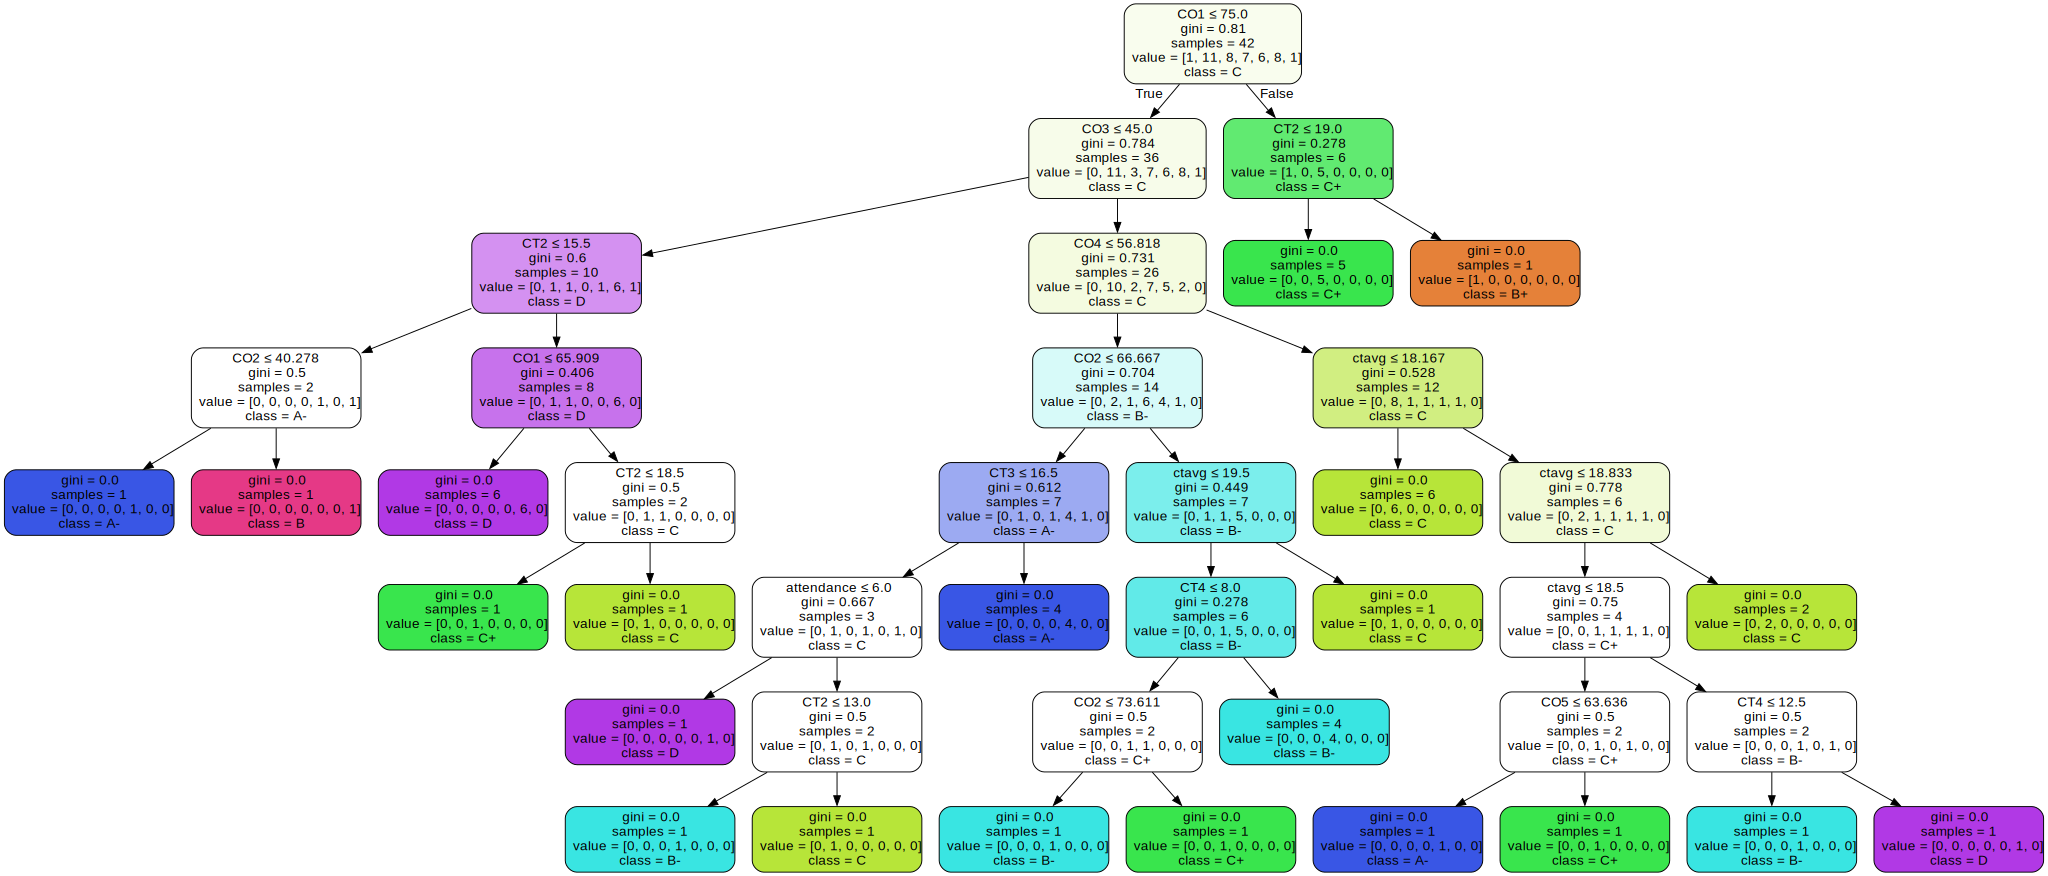

In [820]:
cname = set(dataset['total'].unique())
cname=list(cname)
cname = [str(elem) for elem in cname]
# Visualize the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.values,  
                           class_names=cname,  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("suv_data_tree")

# Show the decision tree
graph